# Etude numérique d'un filtre linéaire

__But :__ Simuler, à l'aide d'un langage de programmation, l'action d'un filtre sur un signal périodique. Mettre en évidence l'influence des caractéristiques du filtre sur l'opération de filtrage.

## Fonctions utiles

Cette activité fait suite à l'activité où vous avez appris à reconstruire un signal à partir des ses composantes spectrales. _Pour gagner du temps les fonctions utiles qui avaient déjà été créées à la [première activité](signal_fourier) seront redonnées_.

In [1]:
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read, write  # Pour importer et écrire un fichier son wav

def fonc_temp(t, fs, amps, phis):
    """
    Renvoie la somme des composantes spectrales définies par
    - leurs fréquences freqs
    - leurs amplitudes amprs
    - leurs phases à l'origine phis
    et le calcul à un temps t.
    Cette fonction est vectorialisable : t peut-être un vecteur numpy
    """
    n = len(fs)  # Nombre de composantes spectrales
    s = 0  # Initialisation de la valeur du signal
    for i in range(n):  # On va parcourir les composantes
        if i % 2000 == 0:
            print("{:.0f} %".format(i / n * 100))
        s += 2 * amps[i] * np.cos(2 * np.pi * fs[i] * t + phis[i])  # On ajoute la composante spectrale
    return s


def evalue_temp(fs, amps, phis, t1, t2, N):
    """
    Renvoie deux vecteurs : 
    - un vecteur de N valeurs de temps tk entre t1 et t2
    - un vecteur donnant le signal reconstruit à partir de 
    (fs(fréquence), amps(amplitudes), phis(phase à l"origine))
    calculé aux temps tk
    """
    ts = np.linspace(t1, t2, N)  # Création du vecteur temps
    return ts, fonc_temp(ts, fs, amps, phis)  # Les opérations de evalue_temp sont toutes vectorialisables


def eval_fft(s, fe):
    """
    Calcul la transformée de Fourier du signal donnée par le vecteur s et échantillonné à la fréquence fe
    Il renvoie :
    - la liste de fréquences
    - la liste des amplitudes (jusqu'à fe/2)
    - la liste des phases à l'origine
    Pour un vecteur s de taille N, la taille de la décomposition sera int(N/2) 
    avec un pas de fréquence fe / N
    """
    N = len(s)  # Taille de s pour le vecteur des fréquences
    freqs = np.arange(int(N / 2)) * fe / N  # Liste de fréquence
    sk = fft(s) / N  # Calcul de la TF
    return freqs, np.abs(sk)[:int(N/2)] * 2, np.angle(sk)[:int(N/2)]

## Position du problème
### Signal étudié.
Le signal considéré est téléchargeable par [ce lien](https://github.com/pcsi3physiquestan/donnees_exp/blob/main/signal_bruitee.wav?raw=true). Vous pouvez l'écouter avec VLC ou Audacity : il s'agit un très court extrait d'une musique fortement bruitée.

_Note : Le traitement préalable par Python des fichiers sonores n'est pas parfait et certains lecteurs risquent de ne pas lire correctement le fichier son. Préférez donc les deux lecteurs données précédemment qui peuvent être téléchargés gratuitement._

Nous allons :
* transformer ce signal en un tableau numpy donnant deux signaux __temporels__ (gauche et droite).
* Analyser son tracé temporel et sa décomposition spectrale pour observer qu'est-ce qui est responsable du bruit gênant.
* Procéder à un filtrage approprié pour atténuer le bruit du signal.

### Importation d'un fichier wav
_Pensez à placer votre fichier au niveau du notebook pour pouvoir importer le fichier_.

_Pour information_:
Deux fonctions ont été importées de la bibliothèque `scipy.io.wavfile`:
* `read(chemin_vers_fichier)` qui importe un fichier `.wav` et qui renvoie deux éléments :
    * la fréquence d'échantillonnage
    * un tableau numpy contenant deux lignes : chacune représente le signal sonore temporel respectivement gauche et droite. Les valeurs sont des __flottants compris entre -1 et 1__.
* `write(chemin_vers_fichier, samplerate, data)` qui va écrire dans un fichier .`wav` (il faudra lui donner la bonne extension et choisir un nom __different du fichier d'entrée__ le fichier son correspondant à data :
    * `samplerate` est la fréquence d'échantillonnage
    * `data` est un tableau numpy contenant 2 lignes donnant le signal sonore temporel gauche et droite. Les valeurs devront être des __flottants compris entre -1 et 1__.

## (Théorie)Analyse du signal bruité
> __Exercice A :__  
> Une cellule de code non montrée ici permet d'afficher ci-dessous la fréquence d'échantillonnage, le nombre de points, le tracé temporel et le spectre en fréquence pour les deux signaux gauche et droite.
> 1. Déduire de la fréquence d'échantillonnage et du nombre de points la durée de l'extrait sonore.
> 2. Pouvez-vous observer sur le signal temporel que le signal est bruité ?
> 3. Quelle bande spectrale correspond selon vous au bruit à supprimer ? Quel type de filtre va-t-on utiliser ?

--------------
Fréquence d'échantilonnage : 8000 ech/s
--------------
--------------
Nombre de points du signal : 20126 ech
--------------


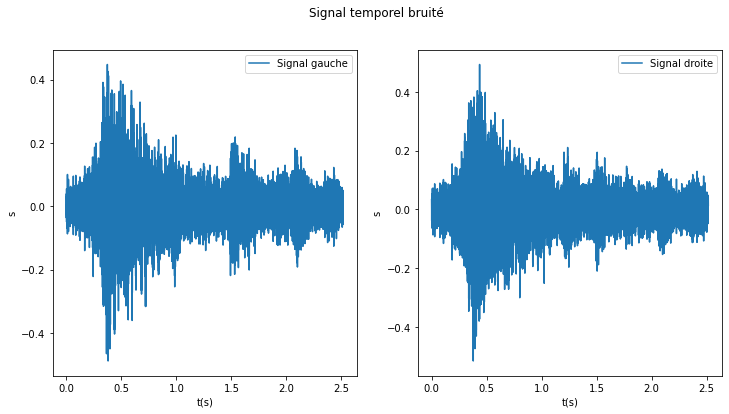

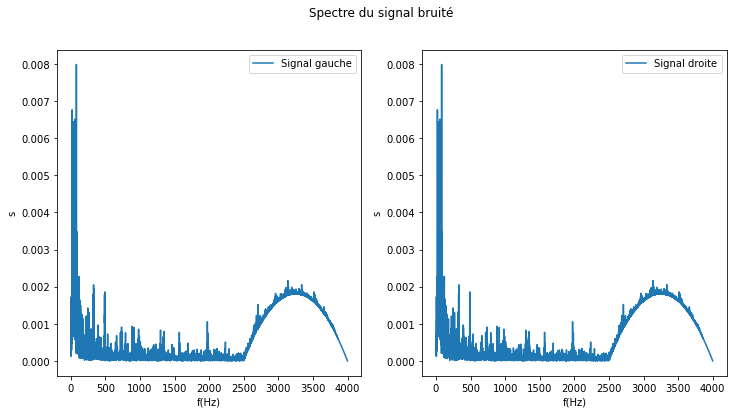

In [2]:
"""Les bibliothèques utiles ont déjà été importées."""

"""Les instructions suivantes chargent les données du fichier wav.
"""
filename = 'sources/signal_bruitee.wav'  # Entrer ici le chemin relatif vers le fichier sonore téléchargé
samplerate, datas = read(filename)

print('--------------')
print("Fréquence d'échantilonnage : {} ech/s".format(samplerate))
print('--------------')

"""Séparation des signaux gauche et droite"""
gauche = datas[:, 0]  # Signal gauche
droite = datas[:, 1]  # Signal droite
npt = len(gauche)  # Nombre de points du signal

print('--------------')
print("Nombre de points du signal : {} ech".format(npt))
print('--------------')


"""Tracé temporel"""
ts = np.arange(npt) * 1 / samplerate  # Création du vecteurs des temps
f, ax = plt.subplots(1, 2, figsize=(12, 6))
f.suptitle("Signal temporel bruité")
ax[0].set_xlabel("t(s)")
ax[0].set_ylabel("s")  # Le signal numérisé n'a pas vraiment d'unité physique
ax[0].plot(ts, gauche, label="Signal gauche")
ax[0].legend()
ax[1].set_xlabel("t(s)")
ax[1].set_ylabel("s")  # Le signal numérisé n'a pas vraiment d'unité physique
ax[1].plot(ts, droite, label="Signal droite")
ax[1].legend()
plt.show()


"""Tracé fréquentielle"""
freqs_g, amps_g, phis_g = eval_fft(gauche, samplerate)  # On utilise la fonction donnée
freqs_d, amps_d, phis_d = eval_fft(gauche, samplerate)  # On utilise la fonction donnée

f, ax = plt.subplots(1, 2, figsize=(12, 6))
f.suptitle("Spectre du signal bruité")
ax[0].set_xlabel("f(Hz)")
ax[0].set_ylabel("s")  # Le signal numérisé n'a pas vraiment d'unité physique
ax[0].plot(freqs_g, amps_g, label="Signal gauche")
ax[0].legend()
ax[1].set_xlabel("f(Hz)")
ax[1].set_ylabel("s")  # Le signal numérisé n'a pas vraiment d'unité physique
ax[1].plot(freqs_d, amps_d, label="Signal droite")
ax[1].legend()
plt.show()